In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import bisect

In [42]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)

In [43]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 
def vstar(px,py,I,rho):
  x = xstar(px,py,I,rho)
  y = ystar(px,py,I,rho)
  return u(x,y,rho)

In [44]:
px = 1
py = 1
tau_x = 0.1
I = 100
rho = 0.5

In [45]:
vref = vstar(px,py,I,rho)
xref = xstar(px,py,I,rho)
yref = ystar(px,py,I,rho)
(vref,xref,yref)

(200.00000000000003, 50.0, 50.0)

In [46]:
vtax = vstar(px*(1+tau_x),py,I,rho)
xtax = xstar(px*(1+tau_x),py,I,rho)
ytax = ystar(px*(1+tau_x),py,I,rho)
(vtax,xtax,ytax)

(190.9090909090909, 43.290043290043286, 52.38095238095239)

In [47]:
rev = xtax*tau_x
rev

4.329004329004329

In [48]:
def slack(cmp,tau_x,px,py,I,rho):
  vref = vstar(px,py,I,rho)
  vtax = vstar(px*(1+tau_x),py,I-cmp,rho)
  return vref - vtax

In [49]:
slack(0,tau_x,px,py,I,rho)

9.090909090909122

In [50]:
cmp = bisect(slack,-0.5*I,0.5*I,args=(tau_x,px,py,I,rho))

In [51]:
cmp

-4.7619047619051

In [52]:
-cmp - tau_x * xstar(px*(1+tau_x),py,I,rho)

0.4329004329007713

In [53]:
def deadweight(tau_x,px,py,I,rho):
  cmp = bisect(slack,-0.5*I,0.5*I,args=(tau_x,px,py,I,rho))
  return -cmp - tau_x * xstar(px*(1+tau_x),py,I,rho)


In [54]:
taus = np.linspace(0.01,0.2,10)

In [58]:
dw_low = [deadweight(tau,px,py,I,0.5) for tau in taus]
dw_high = [deadweight(tau,px,py,I,0.9) for tau in taus]

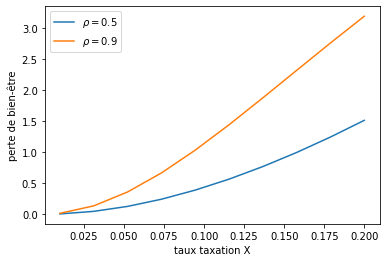

In [62]:
plt.figure()
plt.plot(taus,dw_low,label='$\\rho=0.5$')
plt.plot(taus,dw_high,label='$\\rho=0.9$')
plt.xlabel('taux taxation X')
plt.ylabel('perte de bien-être')
plt.legend()
plt.show()